In [1]:
from nilearn.plotting import plot_glass_brain
import nilearn.plotting
import glob
import nibabel as nib
from nilearn.image import mean_img
import nilearn.plotting as plotting
import numpy as np

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [147]:
mask_imgs = glob.glob('/media/Data/KPE_BIDS/derivatives/fmriprep/sub-*/ses-1/func/sub-*_ses-1_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')
len(mask_imgs)

22

In [148]:
mask_mean = mean_img(mask_imgs)

In [ ]:
func_files = glob.glob('/media/Data/work/modelfit/_subject_id_*/modelestimate/mapflow/_modelestimate0/results/zstat4.nii.gz')
len(func_files)

In [ ]:
for img in func_files:
    print(img)
    plotting.plot_stat_map(img, threshold=2.3, display_mode='x')

In [179]:
# visualize results
t_plot = nib.load('/media/Data/work/fslRandomise/randomize/randomise_tstat1.nii.gz')
p = nib.load('/media/Data/work/fslRandomise/randomize/randomise_tfce_corrp_tstat1.nii.gz')
# suggested threshold should be a=0.005 / .001

thr = 0.95
t_plot_data = t_plot.get_data()
p_data = p.get_data()

# threshold raw t map by p values
p_mask = p_data < thr
t_plot_data[p_mask] = 0

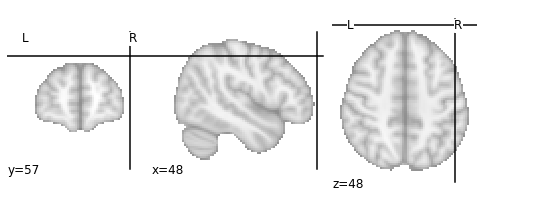

In [180]:
plotting.plot_stat_map(p, threshold = 0.95)

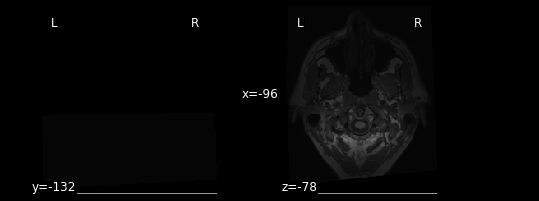

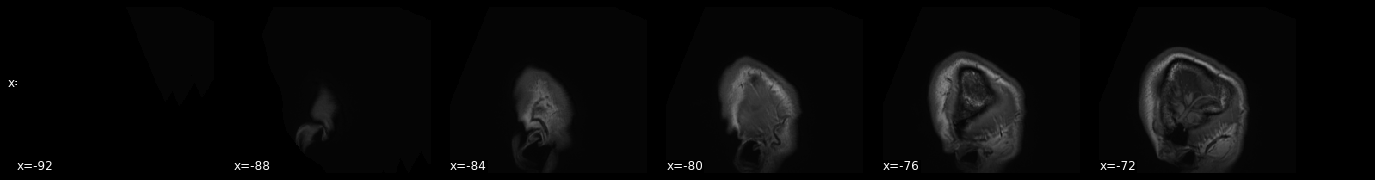

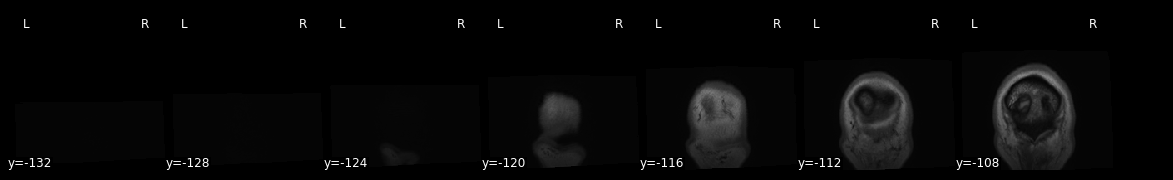

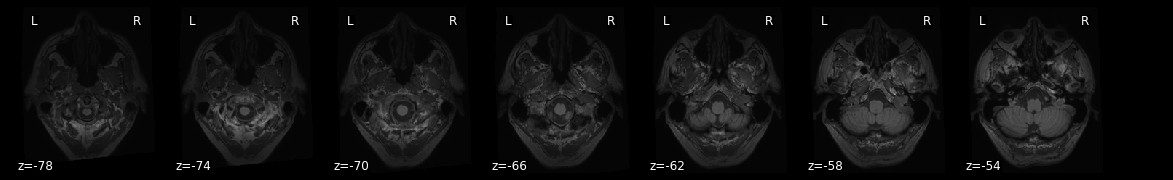

In [181]:
anat_mean = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-1322/anat/sub-1322_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="x", 
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="y",
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="z",
                       colorbar=True)

## The negative picture (in case there is less activation in the second session)

In [13]:
t_plot = nib.load('/media/Data/work/fslRandomise/randomizeNeg/randomise_tstat1.nii.gz')
p = nib.load('/media/Data/work/fslRandomise/randomizeNeg/randomise_tfce_corrp_tstat1.nii.gz')
# suggested threshold should be a=0.005 / .001

thr = 0.1#95 # shuold be 0.975
t_plot_data = t_plot.get_data()
p_data = p.get_data()

# threshold raw t map by p values
p_mask = p_data < thr
t_plot_data[p_mask] = 0

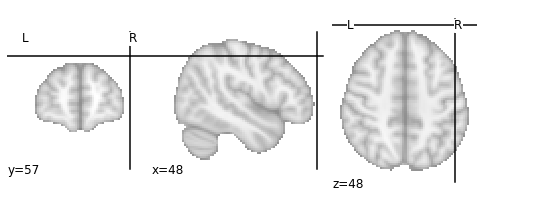

In [11]:
%matplotlib inline
plotting.plot_stat_map(p, threshold = 0.95)

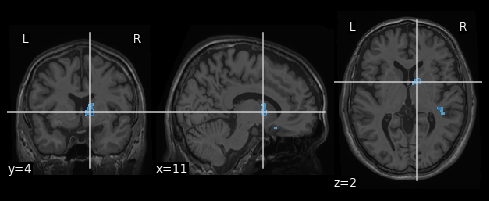

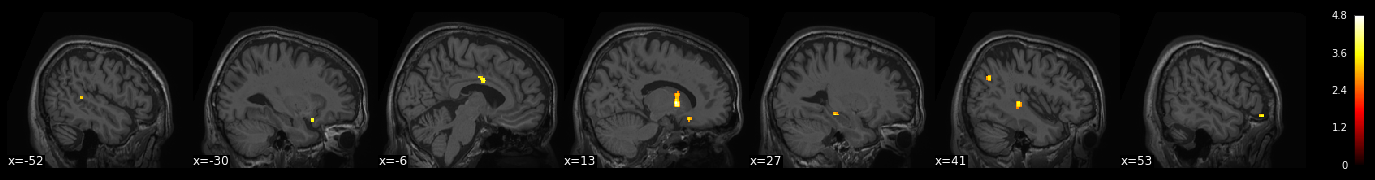

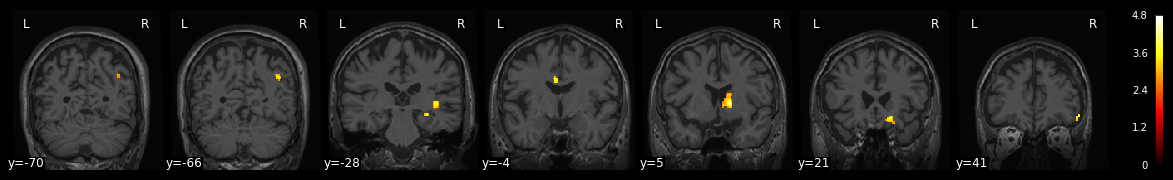

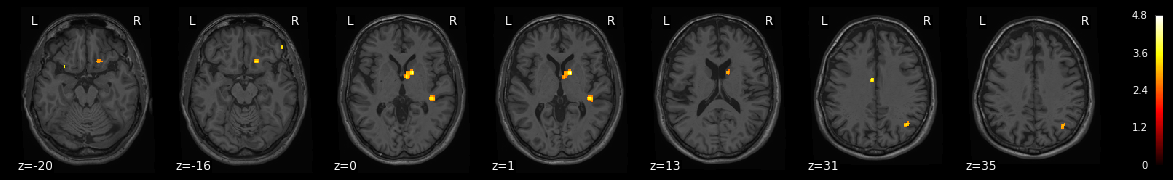

In [14]:
anat_mean = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-1322/anat/sub-1322_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                      cmap = "RdBu", colorbar=False) # use RdYlBu because it is negative originally

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="x", 
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="y",
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="z",
                       colorbar=True)

In [ ]:
# plotting FLAMEO

img = '/media/Data/work/2nd_level/_cope_5/flameo_ols/stats/zstat1.nii.gz'
pstat = '/media/Data/work/2nd_level/_cope_5/fdr_ztop/zstat1_pval.nii.gz'
#t_plot = threshold(img,pstat)
%matplotlib inline
plotting.plot_stat_map(img, threshold = 2.3,bg_img = anat_mean,
                       cut_coords=[-24,0,-20])#                      display_mode='y')
  

In [ ]:
display = plotting.plot_stat_map(img, threshold = 2,bg_img = anat_mean)
display.add_overlay(pstat)
plotting.show()